In [1]:
%matplotlib inline
 
import sys
from pathlib import Path
from typing import Dict
from typing import List

sys.path.append('../src/')
from functions import from_tsv_to_list
from functions import show_random_img_with_all_annotations

In [2]:
DIR_PATH = f'{str(Path.cwd().parent)}'

# test
in_test = from_tsv_to_list(f'{DIR_PATH}/preprocessed_annotations/test-A/in.tsv')
expected_list = from_tsv_to_list(f'{DIR_PATH}/preprocessed_annotations/test-A/out.tsv', skip_empty_lines=False)

path_to_photos = f'{DIR_PATH}/scraped_photos/'

In [3]:
colors_dict = {
    'photograph': 'lime',
    'illustration': 'orangered', 
    'map': 'yellow', 
    'cartoon': 'deepskyblue', 
    'editorial_cartoon': 'violet', 
    'headline': 'cyan', 
    'advertisement': 'deeppink'
    }

444.jpg


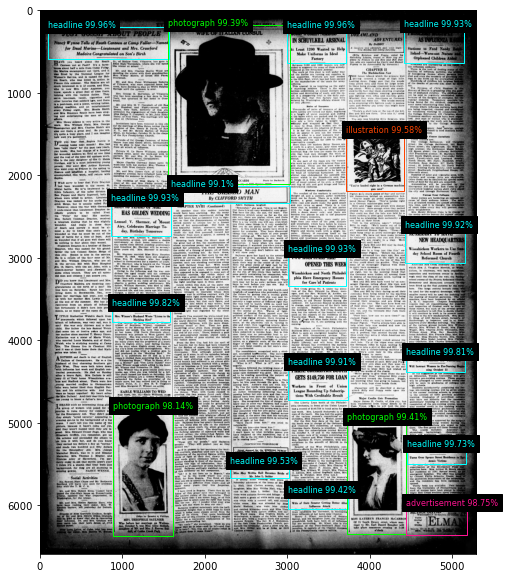

3317.jpg


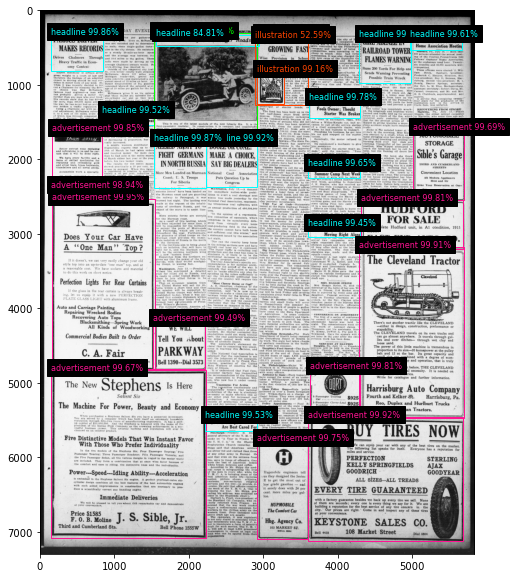

240.jpg


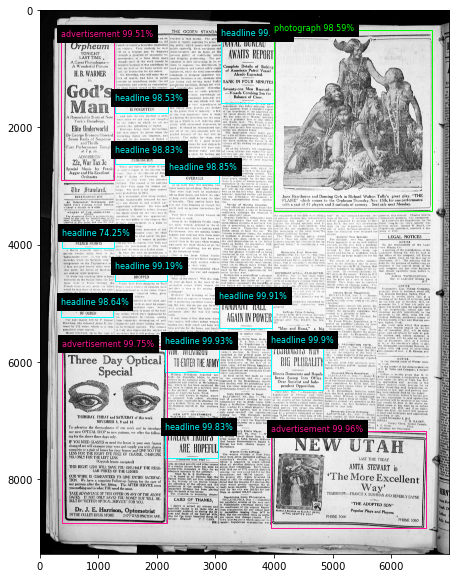

2351.jpg


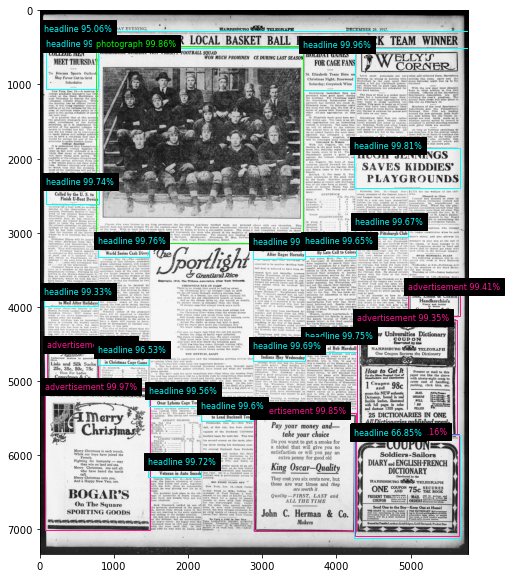

3517.jpg


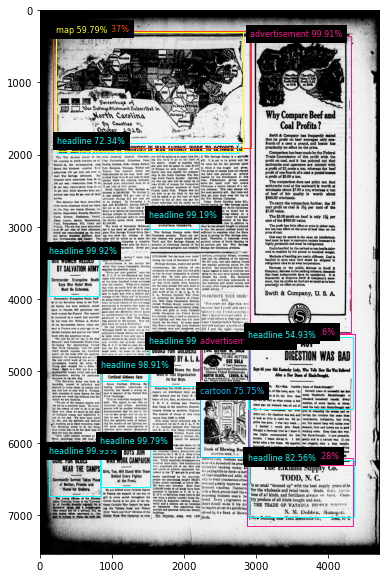

In [4]:
# some random images with annotations
show_random_img_with_all_annotations(
    in_test,
    expected_list,
    path_to_photos,
    colors_dict,
    confidence_level=0.4,
    pages=5
)